<a href="https://colab.research.google.com/github/majarall/NLP/blob/main/lab_1_NLP_ENSAE_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab session 1 
# An introduction to textual data

## Lecture takeaways 

- The Why of NLP
- What is NLP ? the four challenges of NLP

- NLP in three pipelines

cf. https://nlp-ensae.github.io/files/NLP-ENSAE-2021-lecture-1.pdf

## Lab session Prerequisites

- Python 
- Pandas 

For those not familiar with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

## Lab session in a nutshell 

- Grasping a dataset 
- Basic Tokenization (Word Segmentation) of a dataset
(Compute Vocabulary and Zipf's law)
- Introdution to Regex 
- Hands on some processing tools (POS, NER, ...) 

## Resources : 

- NLTK : https://www.nltk.org/api/nltk.tokenize.html 
- PANDAS : https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
- SPACY : https://spacy.io/usage/spacy-101 


## Database

We will use the following database:
https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/01/PLOS_narrativity.csv.zip

This database is used in a scientific article about the **importance of narrativity** in the citation frequency of climate change scientific articles.  https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0167983  


## Tasks

### 1. Basic preprocessing
#### 1.1 Open the database. Generate simple statistics about the abstracts. How many unique articles are there? What is the mean length of abstracts in characters? 
#### 1.2 Generate simple statistics about the annotators' data for each article. Do the annotations seem consistent? 

### 2. Word-level preprocessing
#### 2.1 Split the abstracts into list of words. How many different words are there in the vocabulary? 
#### 2.2 Split the abstracts into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?
#### 2.3 Check if Zipf's law applies. 

### 3. Domain specificity and regex
#### 3.1 Use regex to retrieve numbers (ints, floats, %, years, ...) using a regex. 
#### 3.2 How many percent of characters are numbers (as defined above) in a given abstract? 
#### 3.3 Is there any relationship between the percentage of numbers in an abstract and the amount of citation?  

### 4. Classic NLP pipeline
#### 4.0 Re-tokenize using spacy
#### 4.1 Lemmatize using spacy
#### 4.2 POS tagging using spacy, plot the trees
#### 4.3 NER using spacy, give the amount of each entity type for a given abstract, and compare it to the amount of citations. 

### 5. Topic Modelling
#### 5.1 Use Gensim's LDA to compute a topic model. 
#### 5.2 Use PyLDAvis to visualise the topic model. What are the different topic clusters?
#### 5.3 Use a tf-idf representation for each abstract, and use your favorite clustering algorithm.

In [4]:
# Downloading the database
# from https://www.kaggle.com/crowdflower/narrativity-in-scientific-publishing and unzip
# upload to the google colab 

In [5]:
!curl https://www.kaggle.com/crowdflower/narrativity-in-scientific-publishing >> PLOS_narrativity.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37886    0 37886    0     0   127k      0 --:--:-- --:--:-- --:--:--  127k


In [8]:
! head -n 50 PLOS_narrativity.csv

<!DOCTYPE html>
<html lang="en">

<head>
  <title>Narrativity in Scientific Publishing | Kaggle</title>
  <meta charset="utf-8" />
  <meta name="robots" content="index, follow" />
  <meta name="description" content="Is scientific research written in a narrative style more influential?" />
  <meta name="turbolinks-cache-control" content="no-cache" />
    <meta name="keywords" content="earth and nature,education,research" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0">
  <meta name="theme-color" content="#008ABC" />
  <script nonce="/UOyVzzAKvN3N05m0JWxgg==" type="text/javascript">
    window["pageRequestStartTime"] = 1631621158364;
    window["pageRequestEndTime"] = 1631621158507;
    window["initialPageLoadStartTime"] = new Date().getTime();
  </script>
  <link rel="preconnect" href="https://www.google-analytics.com" crossorigin="anonymous" /><link rel="preconnect" href="https://stats.g.doubleclick.net" /><link rel="pr

# 1. Basic preprocessing






## 1.1 Open the database. Generate simple statistics about the abstracts. How many unique articles are there? What is the mean length of abstracts in characters?

In [6]:
%matplotlib inline
# import pandas to handle dataframe tables and its related operations
import pandas as pd
# import matplotlib to display charts
import matplotlib.pyplot as plt

In [7]:
# Read the Colon Separated Values file and parse it into a Pandas Dataframe named df
df = pd.read_csv('PLOS_narrativity.csv', index_col=0)
# Print the shape of the Dataframe, meaning its size and depth (5614 rows and 47 cols)
print("Shape:  {0}".format(df.shape))

ParserError: ignored

In [ ]:
# length of the unique values of the column 'ab' from dataframe df
len(df['ab'].unique())

802

In [ ]:
# e.g 
# Number of different articles in the database
df.groupby("X_unit_id").count()

,X_created_at,X_id,X_started_at,X_tainted,X_channel,X_trust,X_worker_id,X_country,X_region,X_city,X_ip,appeal_to_reader,conjunctions,connectivity,narrative_perspective,sensory_language,setting,ab,appeal_to_reader_gold,conjunctions_gold,connectivity_gold,narrative_perspective_gold,pmid,py,sensory_language_gold,setting_gold,so,tc,af,au,bp,di,ep,is,pd,pt,sn,ti,ut,vl,z9,cin_mas,firstauthor,numberauthors,pid_mas,title
X_unit_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
886110198,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,7,7,0,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,7
886110199,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,7,7,0,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,7
886110200,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,7,7,0,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,7
886110201,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,7,7,0,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,7
886110202,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,7,7,0,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908379225,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,7,7,0,0,7,7,7,7,0,7,0,7,7,7,7,7,7,7,7,0,0,0,0,0
908379226,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,7,7,0,0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,0
908379237,7,7,7,7,7,7,7,7,6,6,7,7,7,7,7,7,7,7,0,0,0,0,7,7,0,0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,0


In [ ]:
# Mean length of abstracts in characters
sum_length = 0
for i in df['ab']:
  length = len(i)
  sum_length += length
avg = sum_length/5614

In [ ]:
print(avg)

1496.1795511221944


In [ ]:
# Repartition of the abstracts length in character

## 1.2 Generate simple statistics about the annotators' data for each article. Do the annotations seem consistent? 


In [ ]:
# First, number of annotator per article ('pmid' variable)
# --> X annotators/article
df.columns

Index(['X_unit_id', 'X_created_at', 'X_id', 'X_started_at', 'X_tainted',
       'X_channel', 'X_trust', 'X_worker_id', 'X_country', 'X_region',
       'X_city', 'X_ip', 'appeal_to_reader', 'conjunctions', 'connectivity',
       'narrative_perspective', 'sensory_language', 'setting', 'ab',
       'appeal_to_reader_gold', 'conjunctions_gold', 'connectivity_gold',
       'narrative_perspective_gold', 'pmid', 'py', 'sensory_language_gold',
       'setting_gold', 'so', 'tc', 'af', 'au', 'bp', 'di', 'ep', 'is', 'pd',
       'pt', 'sn', 'ti', 'ut', 'vl', 'z9', 'cin_mas', 'firstauthor',
       'numberauthors', 'pid_mas', 'title'],
      dtype='object')

In [ ]:
# Seing coherence between annotators : need to transform appeal_to_reader, narrative_perspective, setting to bools. 
# Then, std on the columns. 
  df['appeal_to_reader'] = df.appeal_to_reader.apply(lambda x: True if x=="yes" else False)
df['narrative_perspective'] = df.narrative_perspective.apply(lambda x: True if x=="yes" else False)
df['setting'] = df.setting.apply(lambda x: True if x=="yes" else False)

In [ ]:
eval_cols = ["appeal_to_reader", "conjunctions", "connectivity", "narrative_perspective", "sensory_language", "setting"]
df.groupby(df.pmid)[eval_cols].std()

,appeal_to_reader,conjunctions,connectivity,narrative_perspective,sensory_language,setting
pmid,,,,,,
18726051,0.487950,1.976047,1.000000,0.487950,1.397276,0.000000
18783869,0.534522,1.573592,1.976047,0.377964,1.718249,0.534522
18810525,0.487950,1.345185,1.799471,0.487950,1.463850,0.000000
18810526,0.487950,2.214670,0.975900,0.377964,1.214986,0.000000
18811616,0.534522,1.069045,1.380131,0.377964,1.069045,0.487950
...,...,...,...,...,...,...
22216227,0.487950,1.133893,1.718249,0.534522,2.449490,0.377964
22216263,0.487950,0.951190,2.340126,0.487950,0.975900,0.487950
22216307,0.534522,1.133893,1.799471,0.487950,1.380131,0.377964


In [ ]:
len(df.pmid.unique())

802

# 2. Word-level preprocessing


## 2.1 Split the abstracts into list of words. How many different words are there in the vocabulary?



In [ ]:
from functools import reduce
from operator import add

# List of words with separator = " "
arr = df.ab.drop_duplicates().apply(lambda x: x.split(' ')).array

arr = reduce(add, arr)
#len(set(arr))

## 2.2 Split the abstracts into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?



In [ ]:
# https://www.nltk.org/api/nltk.tokenize.html 
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
# e.g : tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]

## 2.3 Check if Zipf's law applies (slide 40).
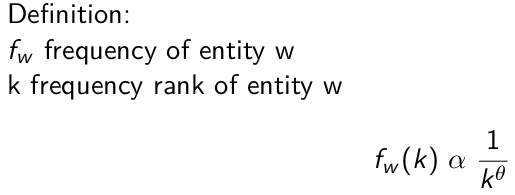

In [ ]:
# This import allows you to count the occurrences of each different elements in a list
from collections import Counter
# example usage: a = [1, 1, 2, 5, 6, 5]; print(Counter(a))

# 3. Domain specificity and regex


## 3.1 Use regex to retrieve numbers (ints, floats, %, years, ...) in abstracts.


*Regex cheasheet* : see python's re module documentation https://docs.python.org/3/library/re.html  

*Other ressources* : 

- A good website to write and test regular expressions : 
https://regex101.com/
- A good game to learn regex : https://alf.nu/RegexGolf 


In [ ]:
import re
# Regular expression that matches any sequence of numbers:
nb =  '[0-9]+' # retrieve all numbers : ([0-9] == from 0 to 9, and + allows multiple matches)

## 3.2 How many percent of characters are numbers (as defined above) in a given abstract?


## 3.3 Is there any relationship between the percentage of numbers in an abstract and the amount of citation?


# 4. Classic NLP pipeline


### 4.0 Re-tokenize using spacy

It is useful to take a look at spacy's [tokenizer documentation](https://spacy.io/usage/spacy-101#annotations-token)

In [ ]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

# Instanciating the tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Repeating the earlier vocabulary count

# Inspecting a tokenization sample


## 4.1 Lemmatize using spacy

In [ ]:
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES
import spacy
nlp = spacy.load("en_core_web_sm")

# Instanciating lemmatizer
lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)
# Usage: lemmatizer(token, POS(token))
# But we will rather use spacy's nlp engine

# Counting lemmas vocabulary count


## 4.2 POS tagging using spacy, plot the trees

In [ ]:
from spacy import displacy


## 4.3 NER using spacy, give the amount of each entity type for a given abstract, and compare it to the amount of citations. 

In [ ]:
# Visualizing Entities
for ab in df.ab.drop_duplicates().head()[:2]:
  doc = nlp(ab)
  displacy.render(doc, style="ent",jupyter=True)

In [ ]:
# Getting the entity Information (takes about 40s)

# Displaying the available entity types

Spacy recognizes 18 entity types. These types are the following:
{'LAW', 'NORP', 'ORDINAL', 'LOC', 'TIME', 'EVENT', 'LANGUAGE', 'CARDINAL', 'WORK_OF_ART', 'PRODUCT', 'PERCENT', 'DATE', 'GPE', 'MONEY', 'PERSON', 'ORG', 'QUANTITY', 'FAC'}


In [ ]:
# Get counts for Every entity type

In [ ]:
# Displaying correlations for every entity type's presence with log(tc)

Regarding CARDINAL, the correlation could not be rejected :
 spearmanr: (-0.1857760776916116, 1.1637837577962128e-07), pearsonr: (-0.13621815478310795, 0.0001089790717316319)
Regarding GPE, the correlation could not be rejected :
 spearmanr: (-0.23700487353088792, 1.057074194306966e-11), pearsonr: (-0.1558344169608617, 9.275970994185234e-06)
Regarding PERSON, the correlation could not be rejected :
 spearmanr: (-0.16136566818523898, 4.3730537725663865e-06), pearsonr: (-0.16124840625300163, 4.444500635012091e-06)
Regarding ORG, the correlation could not be rejected :
 spearmanr: (-0.19201245528955035, 4.2458596382389345e-08), pearsonr: (-0.12401802948281859, 0.00043112063221038604)



# 5. Topic Modelling


## 5.1 Use Gensim's LDA to compute a topic model. 


In [ ]:
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
to_be_removed = list(en_stop) + list(punctuation)

tok = TreebankWordTokenizer()
# Tokenizing + removing stopwords
# continue here

## 5.2 Use PyLDAvis to visualise the topic model. What are the different topic clusters?


In [ ]:
!pip install pyLDAvis


In [ ]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

Topic modelling not very relevant here.